In [3]:
import time

import requests, json
import pandas as pd
from sqlalchemy import create_engine, text

In [4]:
#Datos de conexión
db_host = "10.133.28.155"
db_port= 5432
db_user = "postgres"
db_passwd="Cl431Ns3gur4"
db_name="rickandmorty"

#Xerar a cadea de conexión en base aos parámetros anteriores
connectionString=f'postgresql+psycopg2://{db_user}:{db_passwd}@{db_host}:{db_port}/{db_name}'

In [5]:
def dbDeleteAll(table, cn = connectionString):
    engine = create_engine(cn)
    with engine.connect() as connection:
        with connection.begin():
            cadeaSQL = text(f"DELETE FROM {table};")
            connection.execute(cadeaSQL)

def dbSelect(table, columns = "*", cn = connectionString):
    engine = create_engine(cn)

    cadeaSQL = f"SELECT {columns} FROM {table};"
    dfPanda = pd.read_sql(cadeaSQL, engine)

    return dfPanda

def dbInsert(query, json_string, cn = connectionString):
    engine = create_engine(cn)
    with engine.connect() as connection:
        data = json.loads(json_string)
        for i in range(0, len(data)):
            with connection.begin():
                connection.execute(query, data[i])
                connection.commit()


def createJsonByUrl(url, names):
    jsonResult = "[ "

    page_num = requests.get(f"{url}?page=1").json()["info"]["pages"]
    for i in range(1, page_num):
        items = requests.get(f"{url}?page={i}").json()["results"]
        for item in items:
            jsonResult += "{ "
            for name in names:
                if (len(name.split(",")) == 2):
                    aux = name.split(",")
                    jsonResult += f'"{aux[0]}":"{item[aux[0]][aux[1]]}", '
                else:
                    jsonResult += f'"{name}":"{item[name]}", '
            jsonResult = jsonResult[:-2]
            jsonResult += " }, "

    jsonResult = jsonResult[:-2]
    jsonResult += " ]"

    return jsonResult

def createQueryByNames(table, names):
    result = f"INSERT INTO {table} ("

    for name in names:
        if (len(name.split(",")) == 2):
            aux = name.split(",")
            result += f"{aux[0]}, "
        else:
            result += f"{name}, "

    result = result[:-2]
    result += ") VALUES ("
    
    for name in names:
        if (len(name.split(",")) == 2):
            aux = name.split(",")
            result += f":{aux[0]}, "
        else:
            result += f":{name}, "
    
    result = result[:-2]
    result += ")"

    return result

# Postgres:

In [5]:
url_personajes = "https://rickandmortyapi.com/api/character"
nombres = ["id", "name", "status", "species", "type", "gender", "origin,name", "location,name", "image"]

dbDeleteAll("personaje")

json_string = createJsonByUrl(url_personajes, nombres)
query = createQueryByNames("personaje", nombres)

dbInsert(text(query), json_string)
dbSelect("personaje").head(100)

,id,name,status,species,type,gender,origin,location,image
0,12,Alexander,Dead,Human,,Male,Earth (C-137),Anatomy Park,https://rickandmortyapi.com/api/character/avat...
1,13,Alien Googah,unknown,Alien,,unknown,unknown,Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...
2,14,Alien Morty,unknown,Alien,,Male,unknown,Citadel of Ricks,https://rickandmortyapi.com/api/character/avat...
3,15,Alien Rick,unknown,Alien,,Male,unknown,Citadel of Ricks,https://rickandmortyapi.com/api/character/avat...
4,16,Amish Cyborg,Dead,Alien,Parasite,Male,unknown,Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...
...,...,...,...,...,...,...,...,...,...
95,107,Dr. Wong,Alive,Human,,Female,Earth (Replacement Dimension),Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...
96,108,Dr. Xenon Bloom,Dead,Humanoid,Amoeba-Person,Male,unknown,Anatomy Park,https://rickandmortyapi.com/api/character/avat...
97,109,Duck With Muscles,Dead,Alien,Parasite,Male,unknown,Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...
98,110,Eli,Alive,Human,,Male,Post-Apocalyptic Earth,Post-Apocalyptic Earth,https://rickandmortyapi.com/api/character/avat...


In [6]:
url_episodios = "https://rickandmortyapi.com/api/episode"
nombres = ["id", "name", "air_date", "episode", "characters", "created"]

dbDeleteAll("episodio")

json_string = createJsonByUrl(url_episodios, nombres)
query = createQueryByNames("episodio", nombres)

dbInsert(text(query), json_string)
dbSelect("episodio").head(100)

,id,name,air_date,episode,characters,created
0,1,Pilot,"December 2, 2013",S01E01,['https://rickandmortyapi.com/api/character/1'...,2017-11-10T12:56:33.798Z
1,2,Lawnmower Dog,"December 9, 2013",S01E02,['https://rickandmortyapi.com/api/character/1'...,2017-11-10T12:56:33.916Z
2,3,Anatomy Park,"December 16, 2013",S01E03,['https://rickandmortyapi.com/api/character/1'...,2017-11-10T12:56:34.022Z
3,4,M. Night Shaym-Aliens!,"January 13, 2014",S01E04,['https://rickandmortyapi.com/api/character/1'...,2017-11-10T12:56:34.129Z
4,5,Meeseeks and Destroy,"January 20, 2014",S01E05,['https://rickandmortyapi.com/api/character/1'...,2017-11-10T12:56:34.236Z
5,6,Rick Potion #9,"January 27, 2014",S01E06,['https://rickandmortyapi.com/api/character/1'...,2017-11-10T12:56:34.339Z
6,7,Raising Gazorpazorp,"March 10, 2014",S01E07,['https://rickandmortyapi.com/api/character/1'...,2017-11-10T12:56:34.441Z
7,8,Rixty Minutes,"March 17, 2014",S01E08,['https://rickandmortyapi.com/api/character/1'...,2017-11-10T12:56:34.543Z
8,9,Something Ricked This Way Comes,"March 24, 2014",S01E09,['https://rickandmortyapi.com/api/character/1'...,2017-11-10T12:56:34.645Z
9,10,Close Rick-counters of the Rick Kind,"April 7, 2014",S01E10,['https://rickandmortyapi.com/api/character/1'...,2017-11-10T12:56:34.747Z


# MongoDB:

In [7]:
%conda install -y pymongo dnspython

Channels:
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [8]:
from pymongo import MongoClient

HOST = "cluster0.iosni.mongodb.net"
PORT = 27017
USERNAME = "gabrieledreira"
PASSWORD = "QDPhHQHncc4HXUCx"

if HOST == 'localhost':
    if not USERNAME:
        cli_mongo = MongoClient(HOST, PORT)
    else:
        cli_mongo = MongoClient(HOST, PORT, USERNAME, PASSWORD)
else:
    cli_mongo = MongoClient(f"mongodb+srv://{USERNAME}:{PASSWORD}@{HOST}/test")

In [9]:
def dbCreateDB(mongo, name):
    db = mongo.get_database(name)
    if (db == None):
        db = mongo[name]
    return db

def dbDelete(collection, filter = {}):
    collection.delete_many(filter)

def dbCreateCollection(dbE, name):
    collection = dbE.get_collection(name)
    if (collection == None):
        collection = dbE.create_collection(name)
    return collection

def dbInsert(collection, json):
    collection.insert_many(json)

def dbSelect(collection, filter = {}):
    result = list(collection.find(filter))
    dfPanda = pd.json_normalize(result)

    return dfPanda

In [10]:
url_personajes = "https://rickandmortyapi.com/api/character"
nombres = ["id", "name", "status", "species", "type", "gender", "origin,name", "location,name", "image"]

json_string = json.loads(createJsonByUrl(url_personajes, nombres))

dbE = dbCreateDB(cli_mongo, 'RickAndMorty')
personaje_coll = dbCreateCollection(dbE, 'personaje')

dbDelete(personaje_coll)

dbInsert(personaje_coll, json_string)
dbSelect(personaje_coll).head(100)


,_id,id,name,status,species,type,gender,origin,location,image
0,67dc514b15833213c77af546,1,Rick Sanchez,Alive,Human,,Male,Earth (C-137),Citadel of Ricks,https://rickandmortyapi.com/api/character/avat...
1,67dc514b15833213c77af547,2,Morty Smith,Alive,Human,,Male,unknown,Citadel of Ricks,https://rickandmortyapi.com/api/character/avat...
2,67dc514b15833213c77af548,3,Summer Smith,Alive,Human,,Female,Earth (Replacement Dimension),Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...
3,67dc514b15833213c77af549,4,Beth Smith,Alive,Human,,Female,Earth (Replacement Dimension),Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...
4,67dc514b15833213c77af54a,5,Jerry Smith,Alive,Human,,Male,Earth (Replacement Dimension),Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...
...,...,...,...,...,...,...,...,...,...,...
95,67dc514b15833213c77af5a5,96,Tuberculosis,Dead,Disease,,unknown,Anatomy Park,Anatomy Park,https://rickandmortyapi.com/api/character/avat...
96,67dc514b15833213c77af5a6,97,Gonorrhea,Dead,Disease,,unknown,Anatomy Park,Anatomy Park,https://rickandmortyapi.com/api/character/avat...
97,67dc514b15833213c77af5a7,98,Hepatitis A,Dead,Disease,,unknown,Anatomy Park,Anatomy Park,https://rickandmortyapi.com/api/character/avat...
98,67dc514b15833213c77af5a8,99,Hepatitis C,Dead,Disease,,unknown,Anatomy Park,Anatomy Park,https://rickandmortyapi.com/api/character/avat...


In [11]:
url_episodios = "https://rickandmortyapi.com/api/episode"
nombres = ["id", "name", "air_date", "episode", "characters", "created"]

json_string = json.loads(createJsonByUrl(url_episodios, nombres))

dbE = dbCreateDB(cli_mongo, 'RickAndMorty')
episodio_coll = dbCreateCollection(dbE, 'episodio')

dbDelete(episodio_coll)

dbInsert(episodio_coll, json_string)
dbSelect(episodio_coll).head(100)

,_id,id,name,air_date,episode,characters,created
0,67dc514f15833213c77af87a,1,Pilot,"December 2, 2013",S01E01,['https://rickandmortyapi.com/api/character/1'...,2017-11-10T12:56:33.798Z
1,67dc514f15833213c77af87b,2,Lawnmower Dog,"December 9, 2013",S01E02,['https://rickandmortyapi.com/api/character/1'...,2017-11-10T12:56:33.916Z
2,67dc514f15833213c77af87c,3,Anatomy Park,"December 16, 2013",S01E03,['https://rickandmortyapi.com/api/character/1'...,2017-11-10T12:56:34.022Z
3,67dc514f15833213c77af87d,4,M. Night Shaym-Aliens!,"January 13, 2014",S01E04,['https://rickandmortyapi.com/api/character/1'...,2017-11-10T12:56:34.129Z
4,67dc514f15833213c77af87e,5,Meeseeks and Destroy,"January 20, 2014",S01E05,['https://rickandmortyapi.com/api/character/1'...,2017-11-10T12:56:34.236Z
5,67dc514f15833213c77af87f,6,Rick Potion #9,"January 27, 2014",S01E06,['https://rickandmortyapi.com/api/character/1'...,2017-11-10T12:56:34.339Z
6,67dc514f15833213c77af880,7,Raising Gazorpazorp,"March 10, 2014",S01E07,['https://rickandmortyapi.com/api/character/1'...,2017-11-10T12:56:34.441Z
7,67dc514f15833213c77af881,8,Rixty Minutes,"March 17, 2014",S01E08,['https://rickandmortyapi.com/api/character/1'...,2017-11-10T12:56:34.543Z
8,67dc514f15833213c77af882,9,Something Ricked This Way Comes,"March 24, 2014",S01E09,['https://rickandmortyapi.com/api/character/1'...,2017-11-10T12:56:34.645Z
9,67dc514f15833213c77af883,10,Close Rick-counters of the Rick Kind,"April 7, 2014",S01E10,['https://rickandmortyapi.com/api/character/1'...,2017-11-10T12:56:34.747Z


# Redis:

In [12]:
# %conda install -y -c conda-forge redis-py sqlalchemy

In [13]:
import redis

empregamos_docker=True

r = redis.Redis(
    host = "localhost",
    port = 6379,
    password = "123quetal123"
)

In [11]:
import redis

url_personajes = "https://rickandmortyapi.com/api/character"
nombres = ["id", "name", "status", "species", "type", "gender", "origin,name", "location,name", "image"]
empregamos_docker=True

json_string = json.loads(createJsonByUrl(url_personajes, nombres))

r = redis.Redis(
    host = "10.133.28.155",
    port = 6379,
    password = "123quetal123"
)

r.ping()
if (empregamos_docker):
    a = r.json().set('personajes', '$', json_string)
    personajes = r.json().get('personajes')
    print(personajes)

[{'id': '1', 'name': 'Rick Sanchez', 'status': 'Alive', 'species': 'Human', 'type': '', 'gender': 'Male', 'origin': 'Earth (C-137)', 'location': 'Citadel of Ricks', 'image': 'https://rickandmortyapi.com/api/character/avatar/1.jpeg'}, {'id': '2', 'name': 'Morty Smith', 'status': 'Alive', 'species': 'Human', 'type': '', 'gender': 'Male', 'origin': 'unknown', 'location': 'Citadel of Ricks', 'image': 'https://rickandmortyapi.com/api/character/avatar/2.jpeg'}, {'id': '3', 'name': 'Summer Smith', 'status': 'Alive', 'species': 'Human', 'type': '', 'gender': 'Female', 'origin': 'Earth (Replacement Dimension)', 'location': 'Earth (Replacement Dimension)', 'image': 'https://rickandmortyapi.com/api/character/avatar/3.jpeg'}, {'id': '4', 'name': 'Beth Smith', 'status': 'Alive', 'species': 'Human', 'type': '', 'gender': 'Female', 'origin': 'Earth (Replacement Dimension)', 'location': 'Earth (Replacement Dimension)', 'image': 'https://rickandmortyapi.com/api/character/avatar/4.jpeg'}, {'id': '5', 'n

In [12]:
import redis


url_episodios = "https://rickandmortyapi.com/api/episode"
nombres = ["id", "name", "air_date", "episode", "characters", "created"]
empregamos_docker=True

json_string = json.loads(createJsonByUrl(url_episodios, nombres))

r = redis.Redis(
    host = "10.133.28.155",
    port = 6379,
    password = "123quetal123"
)

r.ping()
if (empregamos_docker):
    a = r.json().set('episodios', '$', json_string)
    episodios = r.json().get('episodios')
    print(episodios)

[{'id': '1', 'name': 'Pilot', 'air_date': 'December 2, 2013', 'episode': 'S01E01', 'characters': "['https://rickandmortyapi.com/api/character/1', 'https://rickandmortyapi.com/api/character/2', 'https://rickandmortyapi.com/api/character/35', 'https://rickandmortyapi.com/api/character/38', 'https://rickandmortyapi.com/api/character/62', 'https://rickandmortyapi.com/api/character/92', 'https://rickandmortyapi.com/api/character/127', 'https://rickandmortyapi.com/api/character/144', 'https://rickandmortyapi.com/api/character/158', 'https://rickandmortyapi.com/api/character/175', 'https://rickandmortyapi.com/api/character/179', 'https://rickandmortyapi.com/api/character/181', 'https://rickandmortyapi.com/api/character/239', 'https://rickandmortyapi.com/api/character/249', 'https://rickandmortyapi.com/api/character/271', 'https://rickandmortyapi.com/api/character/338', 'https://rickandmortyapi.com/api/character/394', 'https://rickandmortyapi.com/api/character/395', 'https://rickandmortyapi.co

# Capturas:


## Estructura de la Base de Datos:
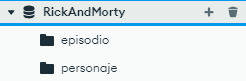 

<br>

## Tabla Episodio:

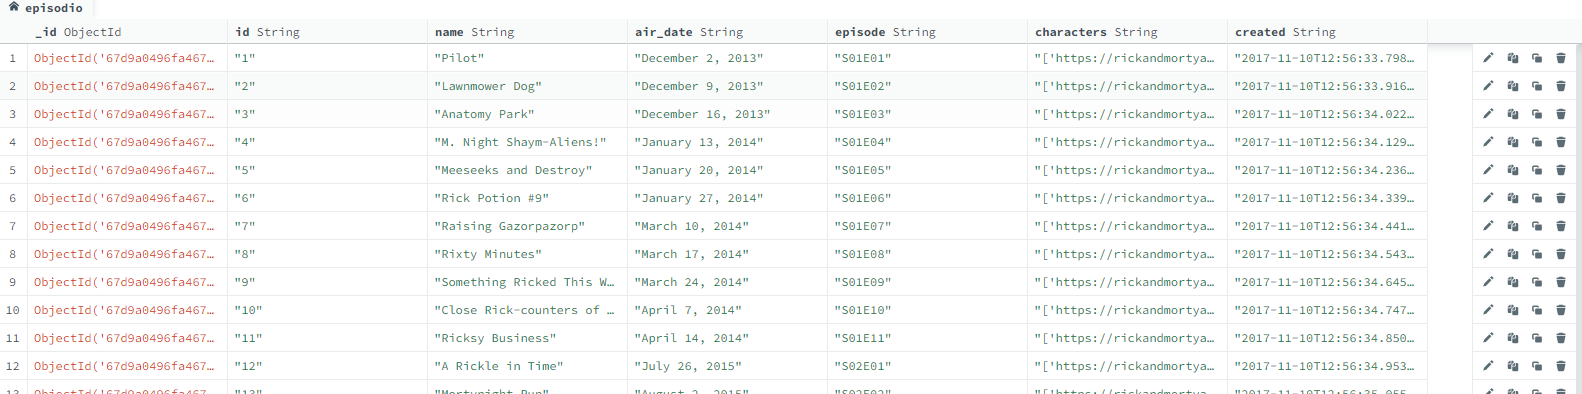 

<br>

## Tabla Personaje:

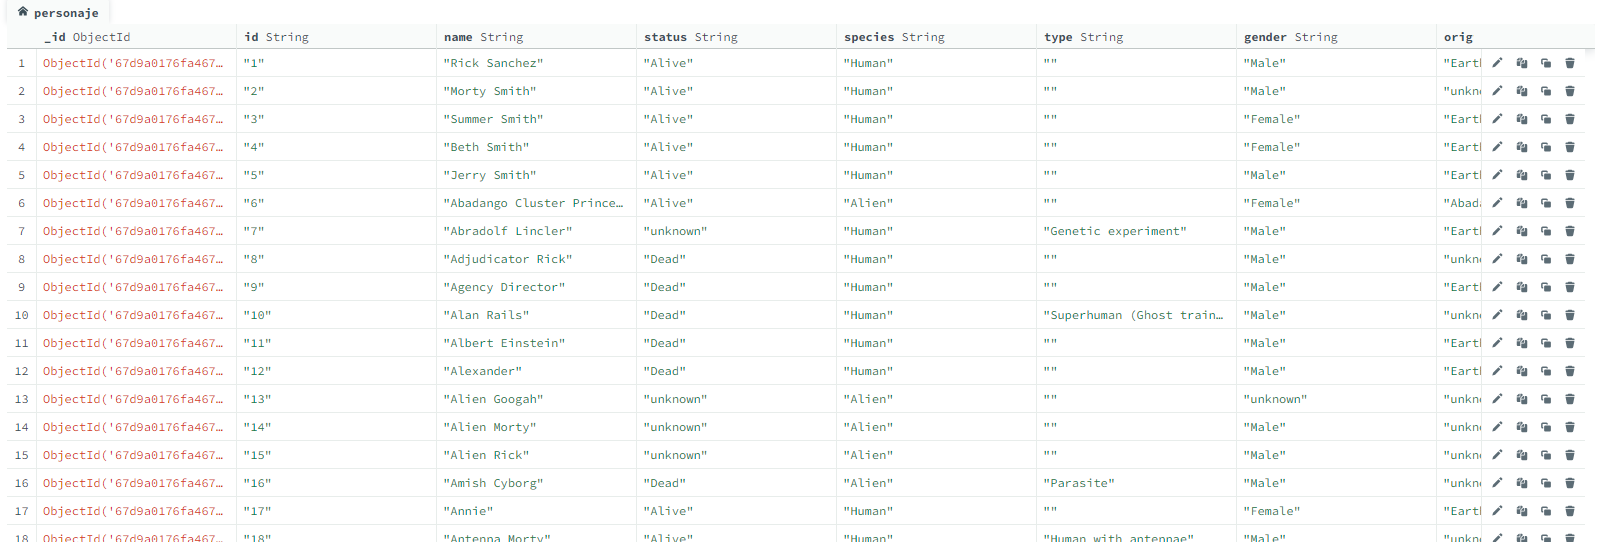

# Capturas Redis:

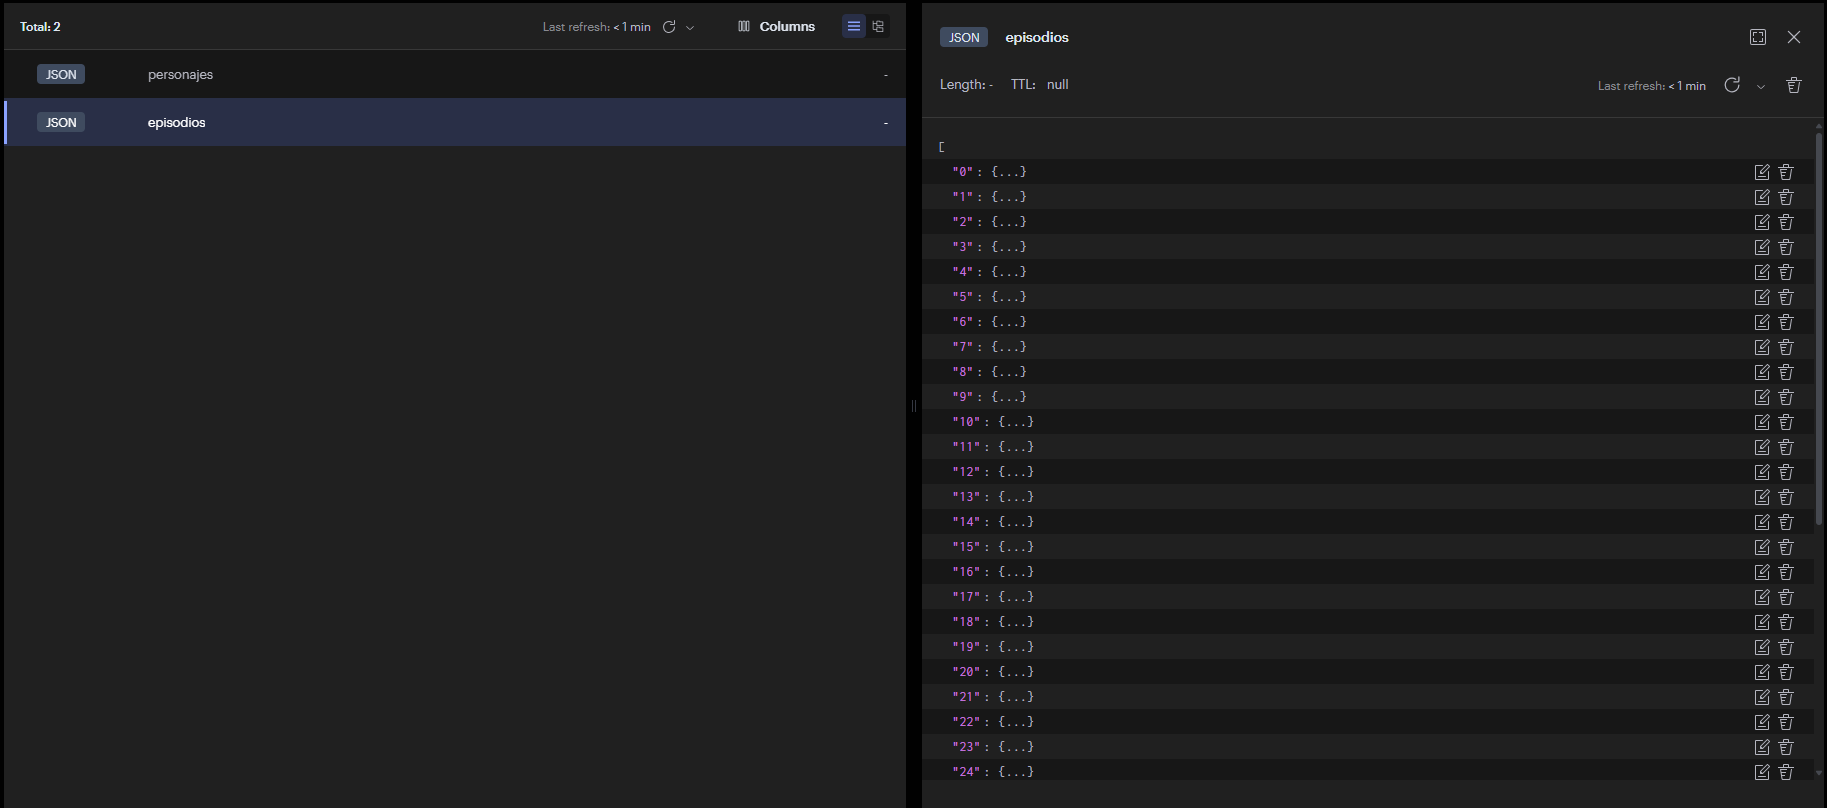